# Multiple Linear Regression Model - Bike Sharing Demand

In [50]:
import warnings
warnings.filterwarnings('always')
warnings.filterwarnings('ignore')

In [51]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

sns.set()

### Reading and Understanding the Data

In [52]:
bike= pd.read_csv('day.csv')

In [53]:
bike.head()

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,01-01-2018,1,0,1,0,6,0,2,14.110847,18.18125,80.5833,10.749882,331,654,985
1,2,02-01-2018,1,0,1,0,0,0,2,14.902598,17.68695,69.6087,16.652113,131,670,801
2,3,03-01-2018,1,0,1,0,1,1,1,8.050924,9.47025,43.7273,16.636703,120,1229,1349
3,4,04-01-2018,1,0,1,0,2,1,1,8.200000,10.60610,59.0435,10.739832,108,1454,1562
4,5,05-01-2018,1,0,1,0,3,1,1,9.305237,11.46350,43.6957,12.522300,82,1518,1600


In [54]:
bike.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 730 entries, 0 to 729
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     730 non-null    int64  
 1   dteday      730 non-null    object 
 2   season      730 non-null    int64  
 3   yr          730 non-null    int64  
 4   mnth        730 non-null    int64  
 5   holiday     730 non-null    int64  
 6   weekday     730 non-null    int64  
 7   workingday  730 non-null    int64  
 8   weathersit  730 non-null    int64  
 9   temp        730 non-null    float64
 10  atemp       730 non-null    float64
 11  hum         730 non-null    float64
 12  windspeed   730 non-null    float64
 13  casual      730 non-null    int64  
 14  registered  730 non-null    int64  
 15  cnt         730 non-null    int64  
dtypes: float64(4), int64(11), object(1)
memory usage: 91.4+ KB


In [55]:
bike.describe()

,instant,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000
mean,365.500000,2.498630,0.500000,6.526027,0.028767,2.997260,0.683562,1.394521,20.319259,23.726322,62.765175,12.763620,849.249315,3658.757534,4508.006849
std,210.877136,1.110184,0.500343,3.450215,0.167266,2.006161,0.465405,0.544807,7.506729,8.150308,14.237589,5.195841,686.479875,1559.758728,1936.011647
min,1.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,2.424346,3.953480,0.000000,1.500244,2.000000,20.000000,22.000000
25%,183.250000,2.000000,0.000000,4.000000,0.000000,1.000000,0.000000,1.000000,13.811885,16.889713,52.000000,9.041650,316.250000,2502.250000,3169.750000
50%,365.500000,3.000000,0.500000,7.000000,0.000000,3.000000,1.000000,1.000000,20.465826,24.368225,62.625000,12.125325,717.000000,3664.500000,4548.500000
75%,547.750000,3.000000,1.000000,10.000000,0.000000,5.000000,1.000000,2.000000,26.880615,30.445775,72.989575,15.625589,1096.500000,4783.250000,5966.000000
max,730.000000,4.000000,1.000000,12.000000,1.000000,6.000000,1.000000,3.000000,35.328347,42.044800,97.250000,34.000021,3410.000000,6946.000000,8714.000000


In [56]:
bike.shape

(730, 16)

In [57]:
bike['dteday'].dtype

dtype('O')

The datatype of "dteday" should be in datetime format.

In [58]:
bike['dteday'] =  pd.to_datetime(bike['dteday'],format='%d-%m-%Y')

In [59]:
# Extracting the Year and Month from the dteday column.

bike["Year"] = pd.DatetimeIndex(bike['dteday']).year
bike["Month"] = pd.DatetimeIndex(bike['dteday']).month

In [60]:
bike.head()

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt,Year,Month
0,1,2018-01-01,1,0,1,0,6,0,2,14.110847,18.18125,80.5833,10.749882,331,654,985,2018,1
1,2,2018-01-02,1,0,1,0,0,0,2,14.902598,17.68695,69.6087,16.652113,131,670,801,2018,1
2,3,2018-01-03,1,0,1,0,1,1,1,8.050924,9.47025,43.7273,16.636703,120,1229,1349,2018,1
3,4,2018-01-04,1,0,1,0,2,1,1,8.200000,10.60610,59.0435,10.739832,108,1454,1562,2018,1
4,5,2018-01-05,1,0,1,0,3,1,1,9.305237,11.46350,43.6957,12.522300,82,1518,1600,2018,1


There is a possibility that the weekday might also help in observing the demand and contribute to analysis.

In [61]:
bike['week_day'] = bike['dteday'].apply( lambda x: x.dayofweek)
bike.head()

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt,Year,Month,week_day
0,1,2018-01-01,1,0,1,0,6,0,2,14.110847,18.18125,80.5833,10.749882,331,654,985,2018,1,0
1,2,2018-01-02,1,0,1,0,0,0,2,14.902598,17.68695,69.6087,16.652113,131,670,801,2018,1,1
2,3,2018-01-03,1,0,1,0,1,1,1,8.050924,9.47025,43.7273,16.636703,120,1229,1349,2018,1,2
3,4,2018-01-04,1,0,1,0,2,1,1,8.200000,10.60610,59.0435,10.739832,108,1454,1562,2018,1,3
4,5,2018-01-05,1,0,1,0,3,1,1,9.305237,11.46350,43.6957,12.522300,82,1518,1600,2018,1,4


In [62]:
# Dropping the unwanted columns

bike.drop(['instant','dteday','yr','mnth','weekday','holiday'],axis=1,inplace=True)

In [63]:
# Renaming some columns for better understanding

bike.rename(columns={'hum':'humidity','cnt':'count'},inplace=True)

In [64]:
bike.head()

,season,workingday,weathersit,temp,atemp,humidity,windspeed,casual,registered,count,Year,Month,week_day
0,1,0,2,14.110847,18.18125,80.5833,10.749882,331,654,985,2018,1,0
1,1,0,2,14.902598,17.68695,69.6087,16.652113,131,670,801,2018,1,1
2,1,1,1,8.050924,9.47025,43.7273,16.636703,120,1229,1349,2018,1,2
3,1,1,1,8.200000,10.60610,59.0435,10.739832,108,1454,1562,2018,1,3
4,1,1,1,9.305237,11.46350,43.6957,12.522300,82,1518,1600,2018,1,4


### Visualizing the Features with Target

#### season

1. Spring
2. Summer
3. Fall
4. Winter

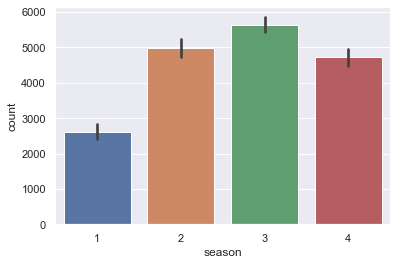

In [65]:
sns.barplot('season','count',data=bike)

Bike Rentals are more during the Fall season.

#### weathersit

1. Clear, Few clouds, Partly cloudy, Partly cloudy
2. Mist + Cloudy, Mist + Broken clouds, Mist + Few clouds, Mist
3. Light Snow, Light Rain + Thunderstorm + Scattered clouds, Light Rain + Scattered clouds


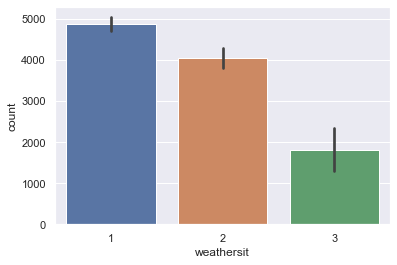

In [66]:
sns.barplot('weathersit','count',data=bike)

Bikes rentals are more in Cloudy weather.

#### workingday


* 1: Weekday
* 0: Weekend/Holiday

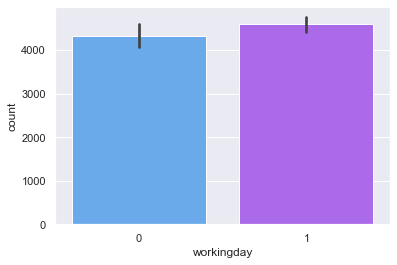

In [67]:
sns.barplot('workingday','count',data=bike,palette='cool')

More bikes are rented on working days.

#### Year

* 2018
* 2019

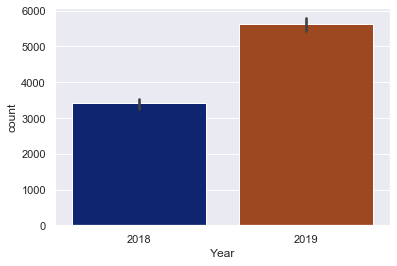

In [68]:
sns.barplot('Year','count',data=bike,palette='dark')

Bike Rental were more in 2019 as compared to 2018.

####  Month

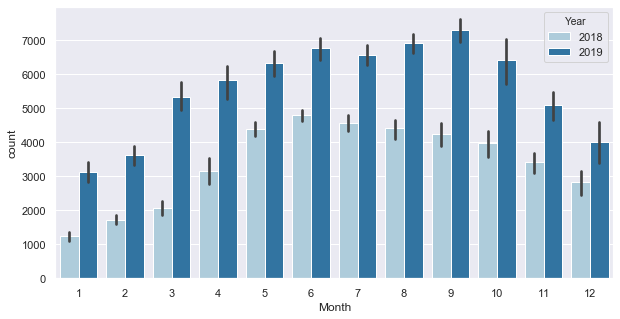

In [69]:
plt.figure(figsize=(10,5))
sns.barplot('Month','count',hue='Year',data=bike,palette='Paired')

Bike rentals peak in the months from May to October.

#### Week-Day

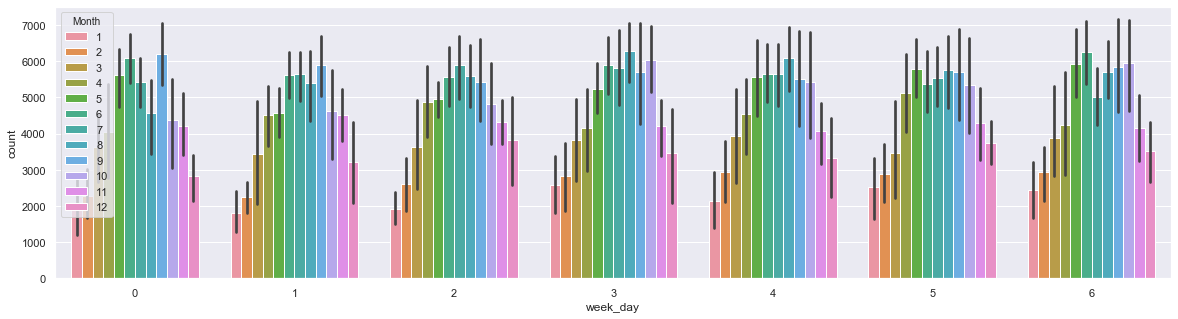

In [70]:
plt.figure(figsize=(20,5))
sns.barplot('week_day','count',hue='Month',data=bike)

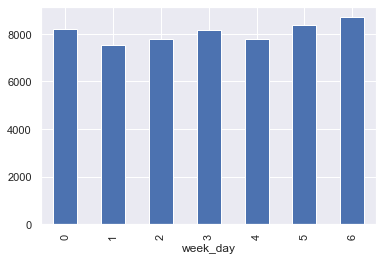

In [71]:
bike.groupby('week_day')['count'].max().plot(kind='bar')

#### Temperature

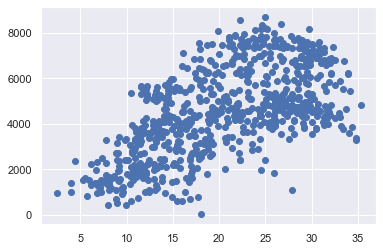

In [72]:
plt.scatter('temp','count',data=bike)

Bike Rentals are more when temperatures are high.

#### Feel-Like Temperature

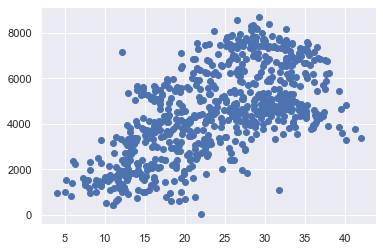

In [73]:
plt.scatter('atemp','count',data=bike)

Bike Rentals are observed at higher "feel-like" temperatures.

#### Humidity

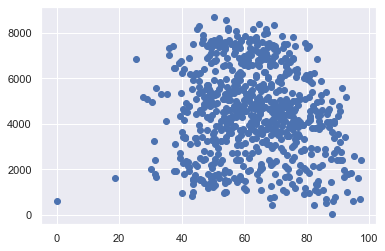

In [74]:
plt.scatter('humidity','count',data=bike)

Bike Rentals are more when humidity is high.

#### Windspeed

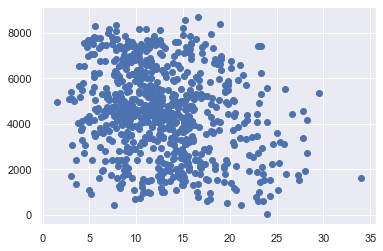

In [75]:
plt.scatter('windspeed','count',data=bike)

#### Distribution of Count

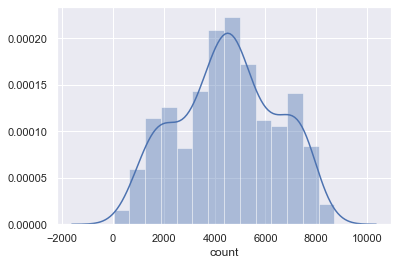

In [76]:
sns.distplot(bike['count'])

## Dealing With Categorical Variables

In [77]:
bike.columns

Index(['season', 'workingday', 'weathersit', 'temp', 'atemp', 'humidity',
       'windspeed', 'casual', 'registered', 'count', 'Year', 'Month',
       'week_day'],
      dtype='object')

In [78]:
bike.head()

,season,workingday,weathersit,temp,atemp,humidity,windspeed,casual,registered,count,Year,Month,week_day
0,1,0,2,14.110847,18.18125,80.5833,10.749882,331,654,985,2018,1,0
1,1,0,2,14.902598,17.68695,69.6087,16.652113,131,670,801,2018,1,1
2,1,1,1,8.050924,9.47025,43.7273,16.636703,120,1229,1349,2018,1,2
3,1,1,1,8.200000,10.60610,59.0435,10.739832,108,1454,1562,2018,1,3
4,1,1,1,9.305237,11.46350,43.6957,12.522300,82,1518,1600,2018,1,4


In [79]:
seasons = pd.get_dummies(bike['season'],drop_first=True,prefix='season')

working_day = pd.get_dummies(bike['workingday'],drop_first=True,prefix='working_day')

weather= pd.get_dummies(bike['weathersit'],drop_first=True,prefix='weather')

year= pd.get_dummies(bike['Year'],drop_first=True,prefix='year')

month= pd.get_dummies(bike['Month'],drop_first=True,prefix='month')

week_day= pd.get_dummies(bike['week_day'],drop_first=True,prefix='day')

In [80]:
bike= pd.concat([bike,seasons,working_day,weather,year,month,week_day],axis=1)

In [81]:
bike.head()

,season,workingday,weathersit,temp,atemp,humidity,windspeed,casual,registered,count,...,month_9,month_10,month_11,month_12,day_1,day_2,day_3,day_4,day_5,day_6
0,1,0,2,14.110847,18.18125,80.5833,10.749882,331,654,985,...,0,0,0,0,0,0,0,0,0,0
1,1,0,2,14.902598,17.68695,69.6087,16.652113,131,670,801,...,0,0,0,0,1,0,0,0,0,0
2,1,1,1,8.050924,9.47025,43.7273,16.636703,120,1229,1349,...,0,0,0,0,0,1,0,0,0,0
3,1,1,1,8.200000,10.60610,59.0435,10.739832,108,1454,1562,...,0,0,0,0,0,0,1,0,0,0
4,1,1,1,9.305237,11.46350,43.6957,12.522300,82,1518,1600,...,0,0,0,0,0,0,0,1,0,0


In [82]:
# Dropping the categorical variables as they are already dummy-encoded.

bike.drop(['season','workingday','weathersit','week_day','Month','Year'],axis=1,inplace=True)

In [83]:
#Dropping the casual and registered columns as they seem not helping the model.

bike.drop(['casual','registered'],axis=1,inplace=True)

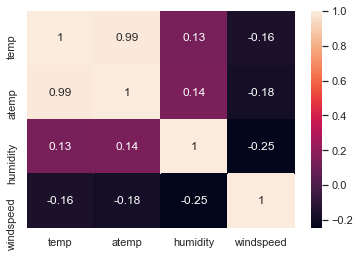

In [84]:
# Dropping 'atemp' column as it seems to be highly correlated with 'temp' column
data= bike[['temp','atemp','humidity','windspeed']]
sns.heatmap(data.corr(),annot=True)

bike.drop('atemp',axis=1,inplace=True)

In [85]:
bike.head()

,temp,humidity,windspeed,count,season_2,season_3,season_4,working_day_1,weather_2,weather_3,...,month_9,month_10,month_11,month_12,day_1,day_2,day_3,day_4,day_5,day_6
0,14.110847,80.5833,10.749882,985,0,0,0,0,1,0,...,0,0,0,0,0,0,0,0,0,0
1,14.902598,69.6087,16.652113,801,0,0,0,0,1,0,...,0,0,0,0,1,0,0,0,0,0
2,8.050924,43.7273,16.636703,1349,0,0,0,1,0,0,...,0,0,0,0,0,1,0,0,0,0
3,8.200000,59.0435,10.739832,1562,0,0,0,1,0,0,...,0,0,0,0,0,0,1,0,0,0
4,9.305237,43.6957,12.522300,1600,0,0,0,1,0,0,...,0,0,0,0,0,0,0,1,0,0


## Splitting the Data into Training and Testing Sets

In [86]:
from sklearn.model_selection import train_test_split

np.random.seed(0)
df_train, df_test = train_test_split(bike, train_size = 0.7, test_size = 0.3, random_state = 100)

### Re-scaling the Features

In [87]:
from sklearn.preprocessing import StandardScaler
scaler= StandardScaler()

In [88]:
# Apply scaler() to all the columns except the'dummy' variables.

num_vars=['temp','humidity','windspeed','count']

df_train[num_vars]= scaler.fit_transform(df_train[num_vars])

In [89]:
df_train.head()

,temp,humidity,windspeed,count,season_2,season_3,season_4,working_day_1,weather_2,weather_3,...,month_9,month_10,month_11,month_12,day_1,day_2,day_3,day_4,day_5,day_6
653,-0.121335,-0.514725,-0.117752,1.562685,0,0,1,1,0,0,...,0,1,0,0,0,1,0,0,0,0
576,1.231731,0.516433,-0.330615,1.399629,0,1,0,1,0,0,...,0,0,0,0,0,1,0,0,0,0
426,-0.420478,-0.069854,-0.385694,-0.215554,0,0,0,0,1,0,...,0,0,0,0,0,0,0,0,0,1
728,-1.294913,-1.045032,2.018143,-1.379511,0,0,0,0,0,0,...,0,0,0,1,0,0,0,0,0,0
482,-0.627580,-1.000840,-0.779889,-0.136589,1,0,0,0,1,0,...,0,0,0,0,0,0,0,0,0,1


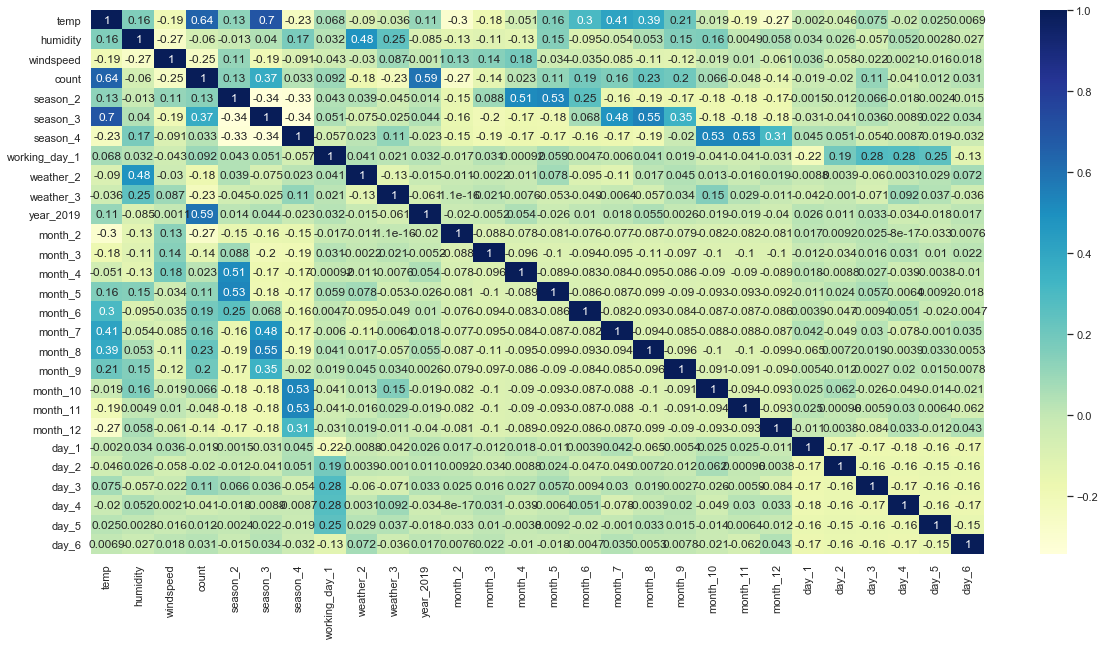

In [90]:
plt.figure(figsize = (20, 10))
sns.heatmap(df_train.corr(), annot = True, cmap="YlGnBu")
plt.show()

It looks like "count" is highly correlated with "temp".

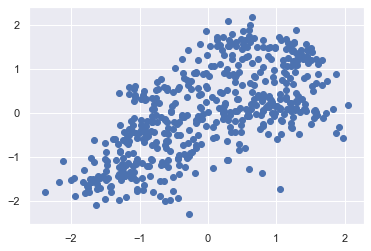

In [91]:
plt.scatter('temp','count',data=df_train)

#### Dividing into Feature and Target sets for the Model Building

In [92]:
y_train = df_train.pop('count')
X_train = df_train

##  Building a linear model

#### Feature Selection : Using Recursive Feature Elimination(RFE) for automated Feature Selection approach

In [93]:
# Importing RFE and LinearRegression
from sklearn.feature_selection import RFE
from sklearn.linear_model import LinearRegression

In [94]:
# Running RFE with output variables=10

lm = LinearRegression()
lm.fit(X_train, y_train)

rfe = RFE(lm,10)
rfe = rfe.fit(X_train, y_train)

In [95]:
list(zip(X_train.columns,rfe.support_,rfe.ranking_))

[('temp', True, 1),
 ('humidity', False, 7),
 ('windspeed', False, 6),
 ('season_2', True, 1),
 ('season_3', True, 1),
 ('season_4', True, 1),
 ('working_day_1', False, 9),
 ('weather_2', True, 1),
 ('weather_3', True, 1),
 ('year_2019', True, 1),
 ('month_2', False, 10),
 ('month_3', False, 2),
 ('month_4', False, 5),
 ('month_5', False, 3),
 ('month_6', False, 4),
 ('month_7', False, 11),
 ('month_8', True, 1),
 ('month_9', True, 1),
 ('month_10', True, 1),
 ('month_11', False, 15),
 ('month_12', False, 14),
 ('day_1', False, 13),
 ('day_2', False, 12),
 ('day_3', False, 16),
 ('day_4', False, 18),
 ('day_5', False, 17),
 ('day_6', False, 8)]

In [96]:
col = X_train.columns[rfe.support_]
col

Index(['temp', 'season_2', 'season_3', 'season_4', 'weather_2', 'weather_3',
       'year_2019', 'month_8', 'month_9', 'month_10'],
      dtype='object')

In [97]:
# Creating X_test dataframe with RFE selected variables
X_train_rfe = X_train[col]

In [98]:
# Adding a constant variable 
import statsmodels.api as sm  
X_train_rfe = sm.add_constant(X_train_rfe)

In [99]:
# Running the linear model
lm = sm.OLS(y_train,X_train_rfe).fit() 

In [100]:
lm.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  count   R-squared:                       0.820
Model:                            OLS   Adj. R-squared:                  0.817
Method:                 Least Squares   F-statistic:                     228.1
Date:                Mon, 27 Jul 2020   Prob (F-statistic):          5.98e-179
Time:                        20:27:07   Log-Likelihood:                -285.69
No. Observations:                 510   AIC:                             593.4
Df Residuals:                     499   BIC:                             639.9
Df Model:                          10                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         -0.8028      0.059    -13.516      0.000      -0.920      -0.686
temp           0.4790      0.035     13.531      0.000       0.409       0.549
season_2       0.5479      0.071      7.729      0.000       0.409       0.687
season_3       0.2332      0.105      2.229      0.026       0.028       0.439
season_4       0.6678      0.064     10.461      0.000       0.542       0.793
weather_2     -0.3556      0.041     -8.691      0.000      -0.436      -0.275
weather_3     -1.3431      0.115    -11.647      0.000      -1.570      -1.117
year_2019      1.0392      0.038     27.107      0.000       0.964       1.115
month_8        0.2129      0.083      2.560      0.011       0.049       0.376
month_9        0.4998      0.082      6.125      0.000       0.339       0.660
month_10       0.1640      0.083      1.973      0.049       0.001       0.327
==============================================================================
Omnibus:                       81.639   Durbin-Watson:                   1.988
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              220.039
Skew:                          -0.788   Prob(JB):                     1.66e-48
Kurtosis:                       5.805   Cond. No.                         9.61
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

### R-squared  = 0.82

In [101]:
X_train_new= X_train_rfe.drop('const',axis=1)

### Checking Multicollinearity of the selected features

In [102]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

vif = pd.DataFrame()
X = X_train_new
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
2,season_3,3.56
0,temp,2.02
3,season_4,1.92
7,month_8,1.85
6,year_2019,1.77
9,month_10,1.62
4,weather_2,1.53
8,month_9,1.48
1,season_2,1.46
5,weather_3,1.09


#### Since all VIF scores are under 4, we can continue with our model.

### Residual Analysis of the train data

In [103]:
y_train_pred = lm.predict(X_train_rfe)

Text(0.5, 0, 'Errors')

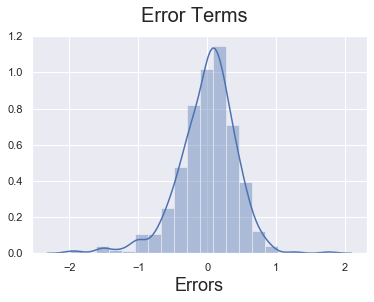

In [104]:
fig = plt.figure()
sns.distplot((y_train - y_train_pred), bins = 20)
fig.suptitle('Error Terms', fontsize = 20)                  # Plot heading 
plt.xlabel('Errors', fontsize = 18)                         # X-label

### Making Predictions

In [105]:
num_vars=['temp','humidity','windspeed','count']

df_test[num_vars]= scaler.transform(df_test[num_vars])

### Dividing into X_test and y_test

In [106]:
y_test = df_test.pop('count')
X_test = df_test

In [107]:
# Creating X_test_new dataframe by dropping variables from X_test
X_test_new = X_test[X_train_new.columns]

# Adding a constant variable 
X_test_new = sm.add_constant(X_test_new)

In [108]:
# Making predictions
y_test_pred = lm.predict(X_test_new)

## Model Evaluation

Text(0, 0.5, 'Predictions')

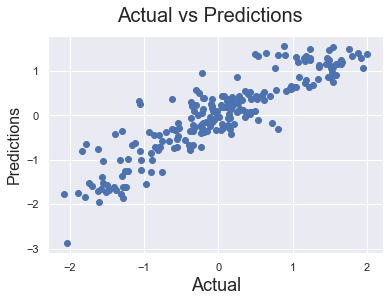

In [109]:
# Plotting y_test and y_pred to understand the spread.
fig = plt.figure()
plt.scatter(y_test,y_test_pred)
fig.suptitle('Actual vs Predictions', fontsize=20)              # Plot heading 
plt.xlabel('Actual', fontsize=18)                          # X-label
plt.ylabel('Predictions', fontsize=16)                          # Y-label

In [110]:
from sklearn.metrics import r2_score
r2_score(y_test, y_test_pred)

0.810488221329706

### The R-squared value of the test dataset is 0.81. Therefore, the model is good!


### Conclusions:
* The error terms are normally distributed.
* The training and testing accuracy are nearly equal hence there is no Overfit situation.
* The predicted values have linear relationship with the actual values.